In [1]:
library("devtools");
library("metacell")
library(tidyverse)
scdb_init("output/scrna_db/", force_reinit=T)

mat_id = "mm_embemb"
mc_id = "mm_embemb"
mc = scdb_mc(mc_id)
mat = scdb_mat(mat_id)

md = mat@cell_metadata
# mc_t = table(mc@mc, mc@colors[mc@mc])

Loading required package: usethis

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

initializing scdb to output/scrna_db/



In [2]:
mm_color_ord = c(
'#FACB12', #PGC
'#f7f79e', #Surface ectoderm
'#C3C388', #Neural crest
'#879E86', #Neural plate boundary
'#CDE088', #Neural tube/Floor plate
'#647A4F', #Forebrain/Midbrain/Hindbrain
'#354E23', #Caudal neural plate
'#649146', #Rostral neural plate
'#90BF75', #Definitive ectoderm
'#635547', #Epiblast
'#DABE99', #Primitive streak
'#9e6762', #Caudal epiblast
'#8e7e59', #Tail bud - neural
'#703C37', #Tail bud - mesoderm
'#C594BF', #Early nascent mesoderm
'#DFCDE4', #Late nascent mesoderm
'#1a3f52', #Caudal mesoderm
'#45d1c5', #Lateral & intermediate mesoderm
'#408DA1', #Paraxial mesoderm
'#A8DBF7', #Presomitic mesoderm
'#1AA2EB', #Somitic mesoderm
'#8DB5CE', #Rostral mesoderm
'#53f1fc', #Cardiopharyngeal mesoderm
'#B51D8D', #Cardiomyocytes
'#8870ad', #ExE mesoderm
'#cc7818', #Amnion/Chorion progenitor
'#824A09', #Amnion/Chorion
'#532C8A', #Allantois
'#ff891c', #Endothelial cells
'#FBBE92', #Haematoendothelial progenitors
'#C9A997', #Blood progenitors
'#C72228', #Erythroid 1
'#FF5608', #Erythroid 3
'#D96B2B', #Erythroid 2
'#c19f70', #Anterior Primitive Streak
'#0F4A9C', #Node/Notochord
'#F397C0', #Definitive endoderm
'#EF5A9D', #Gut
'#F25CD4' #Hindgut
# '#BA9BA1', #Visceral endoderm - anterior
# '#F6BFCB', #Visceral endoderm
# '#7F6874' #ExE visceral endoderm
# '#1A1A1A'  #Parietal endoderm
# '#33CC33', # 4.5
# '#ffad1e', #Chorion
# '#ffd854', #Chorion progenitors
# '#b2b2b2', #TSC2
# '#19ce5b', #SpT-Gly
# '#d6616b', #EPC progenitors
# '#67000d', #TGC progenitors
# '#2e7ebc', #p-TGC
# '#ff78fa' #SpA-TGC
)
oc_color_ord = c( 
'#FACB12', #PGC
'#f7f79e', #Surface ectoderm
'#CDE087', #Floor plate
'#C3C388', #Neural crest
'#879E86', #Neural plate boundary
'#CDE088', #Neural tube
'#647A4F', #Forebrain/Midbrain/Hindbrain
'#354E23', #Caudal neurectoderm
'#649146', #rostral neurectoderm
'#90BF75', #Ectoderm - Definitive
'#635547', #epiblast
'#DABE99', #Primitive streak
'#9e6762', #caudal epiblast
'#E2F700', #Median TFAP
'#C594BF', #nascent mesoderm
'#1a3f52', #caudal mesoderm
'#45d1c5', #Lateral & intermediate mesoderm
'#408DA1', #Paraxial Mesoderm
'#A8DBF7', #Presomitic mesoderm
'#1AA2EB', #Somitic mesoderm
'#8DB5CE', #rostral mesoderm
'#53f1fc', #Cardiopharyngeal mesoderm
'#B51D8D', #Caridac
'#B6A8ED', #Nascent mesoderm - extraembryonic
'#8870ad', #ExE mesoderm
'#cc7818', #Amnion
'#532C8A', #Allantois
'#A69369', #chorionic mesothelium
'#966F1B', #Endothelial2
'#ff891c', #Endothelial
'#FBBE92', #Hematoendothelial
'#c9a997', #Blood progenitors
'#C72228', #Erythroid1
'#FF5608', #Erythroid2
'#c19f70', #Anterior primitive streak
'#6666ED', #Node
'#0F4A9C', #notochord
'#F397C0', #definitive endoderm
'#EF5A9E', #Gut
'#EF5A9D', #Foregut
'#F25CD4' #Hindgut
# '#CF6191', #Hypoblast-Anterior (Hhex/Lhx1/Cer1)
# '#F6BFCB', #hypoblast
# '#572E48', #Yolk sac
# '#050505', #Parietal Endoderm
# '#7B00FF', #Dppa3 Hand1
# '#00FF15', #Dppa3 low Dusp6 neg
# '#FF00B7', #DPPA3 TGM3
# '#D4EB63', #Dusp6 not other
# '#FFFF00', #Gata2 Hand1
# '#FFA600', #Lgals3
# '#54DCE3' #Wfdc2 Aldoc
)


In [3]:
mc_t = table(md[names(mc@mc),"embryo"], mc@colors[mc@mc])
dim(mc_t)

[1] 273   1

In [4]:
mc_tn = (mc_t/rowSums(mc_t))

In [5]:
tmp = unique(md[,c("embryo","transcriptional_rank", "age_group_emb")])

In [6]:
library(data.table)


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [45]:
# tmp = tmp[!is.na(tmp$transcriptional_rank),]
# fwrite(tmp[order(tmp$transcriptional_rank),], "mm_embs.csv")

In [7]:
grouping = fread("mm_embs_new.csv")

In [8]:
emb_groups = grouping$age_group_emb
names(emb_groups) = grouping$embryo

In [9]:
tmp = unique(md[,c("embryo","developmental_time")])

In [10]:
mat@cell_metadata$age_group_emb = emb_groups[mat@cell_metadata$embryo]

In [20]:
scdb_add_mat(id = mat_id, mat = mat)

In [13]:
tmp %>% left_join(grouping) %>% group_by(age_group_emb) %>% summarise(gt = mean(developmental_time, na.rm = T))

Joining, by = "embryo"


age_group_emb,gt
<int>,<dbl>
1,5.876430
2,6.381907
3,6.467854
4,6.602451
5,6.854485
6,7.259960
7,7.591831
8,7.759184
9,7.899598


In [11]:
embord = unique(md[,c("embryo","transcriptional_rank")])
embord = embord[!is.na(embord$transcriptional_rank),]
transcriptional_rank = embord[order(embord$transcriptional_rank),]$embryo

In [12]:
transcriptional_rank = intersect(transcriptional_rank, rownames(mc_tn))

In [23]:
setdiff(mm_color_ord, colnames(mc_tn[transcriptional_rank,]))

character(0)

In [24]:
setdiff(colnames(mc_tn[transcriptional_rank,]), mm_color_ord)

character(0)

In [25]:
mc@color_key

,group,color
,<chr>,<chr>
PGC,PGC,#FACB12
Surface ectoderm,Surface ectoderm,#f7f79e
Neural crest,Neural crest,#C3C388
Neural tube/Floor plate,Neural tube/Floor plate,#CDE088
Forebrain/Midbrain/Hindbrain,Forebrain/Midbrain/Hindbrain,#647A4F
Caudal neural plate,Caudal neural plate,#354E23
Rostral neural plate,Rostral neural plate,#649146
Definitive ectoderm,Definitive ectoderm,#90BF75
Epiblast,Epiblast,#635547


In [14]:
dput(transcriptional_rank)

c("EXE4_M2e2", "EXE4_M2e1", "EXE4_M1e3", "EXE4_M1e1", "EXE4_M1e2", 
"EXE17_e2", "EXE_30_e2", "EXE_30_e1", "EXE17_e3", "EXE17_e5", 
"EXE_29_e1", "EXE_30_e3", "190506_e8", "190506_e2", "EXE_31_e2", 
"EXE_29_e7", "190506_e11", "190506_e10", "190506_e3", "190506_e4", 
"190506_e5", "190506_e7", "190506_e1", "190506_e9", "EXE_29_e6", 
"190506_e12", "EXE_31_e4", "EXE5_E2", "EXE1_E3", "EXE3_m2_e2", 
"EXE8_e4", "EXE15_e3", "190527_1C", "EXE16_M1E2", "EXE16_M3E2", 
"190527_3B", "EXE8_e2", "190527_8B", "190304_W_wt02", "190311_W_wt04", 
"EXE8_e3", "EXE16_M3E5", "EXE16_M2E2", "EXE16_M1E1", "EXE16_M2E5", 
"EXE15_e1", "EXE3_m3_e2", "190527_4D", "190311_W_wt07", "190304_W_wt03", 
"EXE3_m1_e1", "EXE3_m2_e3", "190311_W_wt02", "EXE3_m1_e4", "190304_W_wt08", 
"EXE5_E6", "EXE16_M3E3", "EXE15_e2", "181209_R_12", "181209_R_14", 
"181209_R_15", "EXE_31_e1", "190311_W_wt01", "EXE8_e5", "EXE15_m2e2", 
"EXE3_m1_e3", "EXE3_m2_e1", "EXE16_M3E1", "190527_7C", "190527_4C", 
"EXE16_M3E4", "190304_W_wt07", "EXE16_M2E

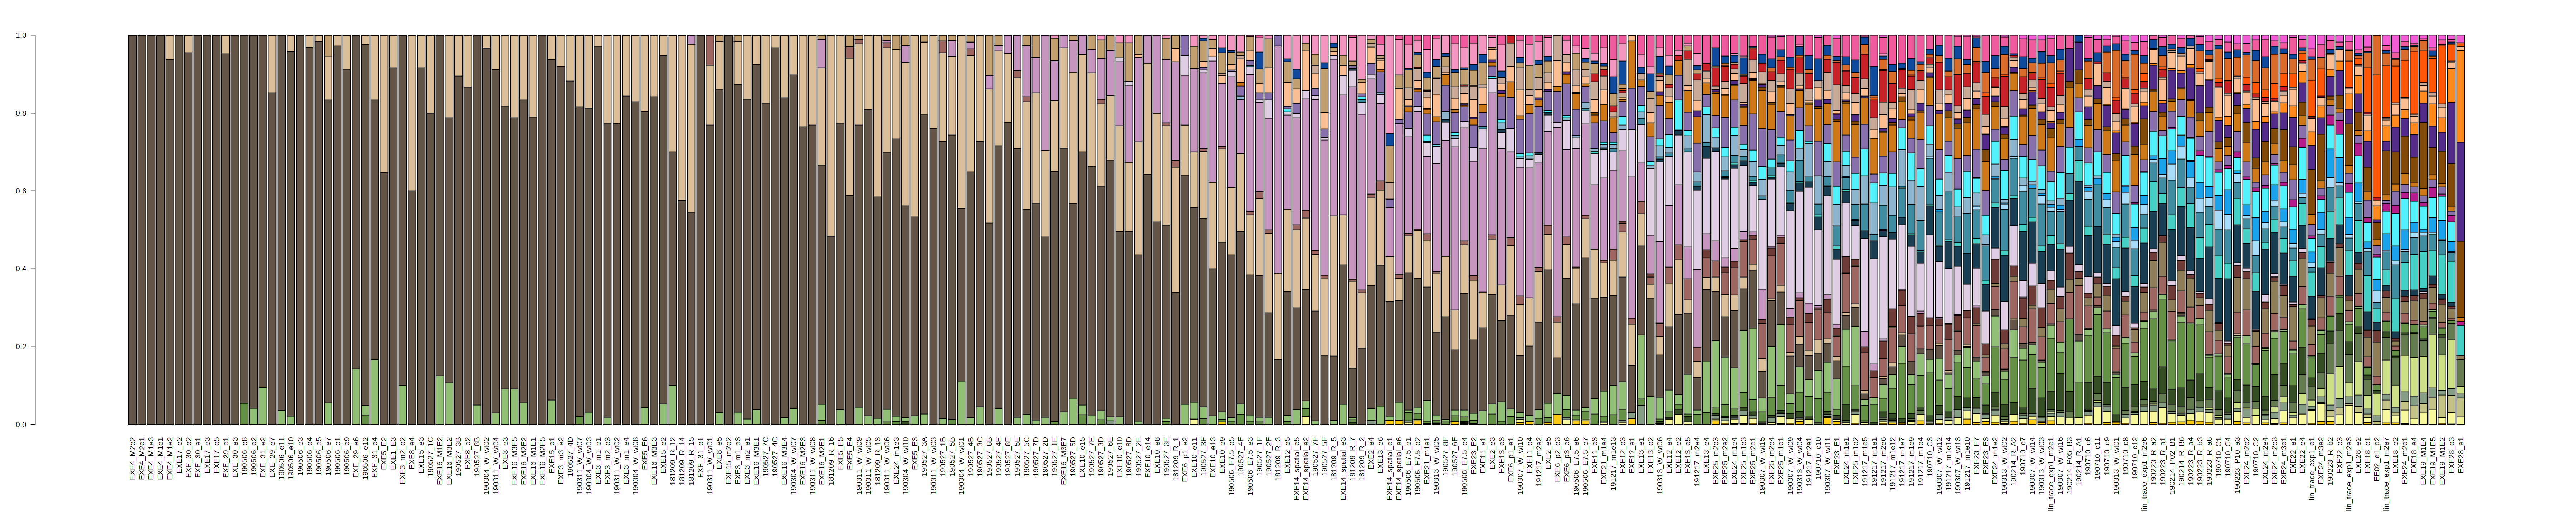

In [31]:
options(repr.plot.width=60, repr.plot.height=12)
# pdf("mm_freq_plot.pdf", width=25, height=12)
op <- par(mar = c(10,4,4,2) + 0.1)
# barplot(t(mc_tn), col=colnames(mc_tn), las=2)
barplot(t(mc_tn[transcriptional_rank,mm_color_ord]), col=colnames(mc_tn[,mm_color_ord]), las=2)
# barplot(t(mc_tn[order(-mc_tn[,"#635547"]),color_ord]), col=colnames(mc_tn[,color_ord]), las=2)
# barplot(t(mc_tn[order(-(mc_tn[,"#635547"]-mc_tn[,'#A69369']-mc_tn[,'#89AB69']-mc_tn[,'#FA5F05']-mc_tn[,'#966F1B']-mc_tn[,'#005579']-mc_tn[,'#13095C'])),color_ord]), col=colnames(mc_tn[,color_ord]), las=2)
# dev.off()
# par(op) ## reset

In [29]:
sim_mat_reorder_rows_and_cols = function(ee_mat) {
  
  count = 0
  n_emb = ncol(ee_mat)
  n_iter_max = 10000
  n_iter = 0
  delta_count = 1
  
  e_order = c(1:nrow(ee_mat))
  
  
  while ((n_iter < n_iter_max)  & (delta_count > 0) ) {
    
    old_count = count
    n_iter = n_iter + 1
    
    for(i in 1:(n_emb-1)) {
      
      #embryo = embryos[i]
      #next_embryo = embryos[i+1]
      
      if (i == 1) {
        #row_2 = sum(ee_mat[embryo,(i+2):n_emb]) - sum(ee_mat[next_embryo,(i+2):n_emb])
        #col_2 = sum(ee_mat[(i+2):n_emb,embryo]) - sum(ee_mat[(i+2):n_emb,next_embryo])
        row_2 = sum(ee_mat[i,(i+2):n_emb]) - sum(ee_mat[i+1,(i+2):n_emb])
        col_2 = sum(ee_mat[(i+2):n_emb,i]) - sum(ee_mat[(i+2):n_emb,i+1])
        if (row_2 +col_2 > 0) {
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          #ee_mat = ee_mat[embryos,embryos]
          count = count + 1 
        }
      } else if (i == (n_emb-1)) {
        #row_1 = sum(ee_mat[embryo,1:(i-1)]) - sum(ee_mat[next_embryo,1:(i-1)])
        #col_1 = sum(ee_mat[1:(i-1),embryo]) - sum(ee_mat[1:(i-1),next_embryo])
        row_1 = sum(ee_mat[i,1:(i-1)]) - sum(ee_mat[i+1,1:(i-1)])
        col_1 = sum(ee_mat[1:(i-1),i]) - sum(ee_mat[1:(i-1),i+1])
        if (row_1 + col_1 > 0) {
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          #ee_mat = ee_mat[embryos,embryos]
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          count = count + 1 
        }
        
      } else {
        #row_1 = sum(ee_mat[embryo,1:(i-1)]) - sum(ee_mat[next_embryo,1:(i-1)])
        #row_2 = sum(ee_mat[embryo,(i+2):n_emb]) - sum(ee_mat[next_embryo,(i+2):n_emb])
        #col_1 = sum(ee_mat[1:(i-1),embryo]) - sum(ee_mat[1:(i-1),next_embryo])
        #col_2 = sum(ee_mat[(i+2):n_emb,embryo]) - sum(ee_mat[(i+2):n_emb,next_embryo])
        row_1 = sum(ee_mat[i,1:(i-1)]) - sum(ee_mat[i+1,1:(i-1)])
        row_2 = sum(ee_mat[i,(i+2):n_emb]) - sum(ee_mat[i+1,(i+2):n_emb])
        col_1 = sum(ee_mat[1:(i-1),i]) - sum(ee_mat[1:(i-1),i+1])
        col_2 = sum(ee_mat[(i+2):n_emb,i]) - sum(ee_mat[(i+2):n_emb,i+1])
        
        if (row_2 - row_1 + col_2 - col_1 > 0) { 
          #embryos[i] = next_embryo
          #embryos[i+1] = embryo
          #ee_mat = ee_mat[embryos,embryos]
          e_order[c(i,i+1)] = e_order[c(i+1,i)]
          ee_mat[c(i,i+1),] = ee_mat[c(i+1,i),]
          ee_mat[,c(i,i+1)] = ee_mat[,c(i+1,i)]
          count = count + 1 
        }
      }
      
      
    }
    delta_count = count - old_count
    print(delta_count)
  }
  
  colnames(ee_mat) = colnames(ee_mat)[e_order]
  rownames(ee_mat) = colnames(ee_mat)
  
  return(list(mat_reshuffled = ee_mat,final_order = e_order))
}


sim_mat_correct_for_batch_effects = function(ee_mat,embryo_coarse_time,embryo_batch) {
  
  embryo_coarse_time = embryo_coarse_time[names(embryo_coarse_time) %in% rownames(ee_mat)]
  embryo_batch = embryo_batch[names(embryo_batch) %in% rownames(ee_mat)]
  
  batches = unique(embryo_batch)
  
  for (batch in batches) {
    
    emb_batch = names(embryo_batch)[embryo_batch == batch]
    
    time_points = unique(embryo_coarse_time[emb_batch])
    other_embryos = setdiff(names(embryo_coarse_time)[embryo_coarse_time %in% time_points],emb_batch)
    
    intra_batch_sim = sum(ee_mat[emb_batch,emb_batch])/(length(emb_batch)*(length(emb_batch)-1))
    inter_batch_sim = sum(ee_mat[emb_batch,other_embryos])/(length(emb_batch)*length(other_embryos))
    
    if((length(emb_batch) > 1) & (intra_batch_sim > 0) & (length(other_embryos) > 1)) {
      ee_mat[emb_batch,emb_batch] = ee_mat[emb_batch,emb_batch]/intra_batch_sim*inter_batch_sim
    }
   
  }
  
  return(ee_mat)
}


generate_emb_emb_similarity_matrix = function(mat_id,graph_id,mc_id,md,included_embryos = NULL,excluded_mcs = NULL,number_of_neighbors = 50,remove_diagonal = TRUE) {
  cgraph = scdb_cgraph(graph_id)
  mat = scdb_mat(mat_id)
  mc = scdb_mc(mc_id)
  
  cls_a = names(mc@mc)[!is.na(md[names(mc@mc),"embryo"])]
  cls_a = intersect(cls_a,colnames(mat@mat))
  
  if(is.null(included_embryos)) {
    included_embryos = unique(md[cls_a,"embryo"])
  }
  included_embryos = intersect(included_embryos,unique(md[cls_a,"embryo"]))
  
  included_mcs =  setdiff(c(1:ncol(mc@e_gc)),excluded_mcs)
  included_cells = cls_a[(mc@mc[cls_a] %in% included_mcs) & (md[cls_a,"embryo"] %in% included_embryos)]
  
  
  cell_to_embryo = as.character(md[included_cells,"embryo"])
  names(cell_to_embryo) = included_cells
  
  # prepare list of edges
  included_edges = cgraph@edges[(( cgraph@edges$mc1 %in% included_cells ) & ( cgraph@edges$mc2 %in% included_cells )),]
  included_edges$mc1 = factor(x = as.character(included_edges$mc1),levels = included_cells)
  included_edges$mc2 = factor(x = as.character(included_edges$mc2),levels = included_cells)
  included_edges$emb1 = factor(cell_to_embryo[included_edges$mc1],levels = included_embryos)
  included_edges$emb2 = factor(cell_to_embryo[included_edges$mc2],levels = included_embryos)
  
  # exclude embryo self edges
  f = included_edges$emb1 != included_edges$emb2
  included_edges = included_edges[f,]
  
  # number of outgoing edges from cell1 should be smaller than number_of_neighbors
  # filter edges with highest rank
  
  f_edges = tapply(X = c(1:nrow(included_edges)),INDEX = included_edges$mc1,function(n_ind) {
    
    if(length(n_ind) > number_of_neighbors) {
      n_ind = n_ind[order(-included_edges$w[n_ind])]
      n_ind = n_ind[1:number_of_neighbors]
    }
    return(n_ind)
  })
  f_edges = unlist(f_edges)
  
  included_edges = included_edges[f_edges,]
  
  # generate similarity matrix by counting edges between two embryos
  mat_emb_neighbors = table(included_edges$emb1,
                            included_edges$emb2)
  
  mat_emb_neighbors = as.matrix(as.data.frame.matrix(mat_emb_neighbors))
  
  #mat_emb_neighbors = 1/2*(mat_emb_neighbors + t(mat_emb_neighbors))
  
  embryo_weight = table(md[included_cells,"embryo"])
  embryo_weight = embryo_weight[rownames(mat_emb_neighbors)]
  
  # Normalize each column by the total number of cells this embryo has.
  mat_emb_neighbors = t(t(mat_emb_neighbors)/as.numeric(embryo_weight))
  #mat_emb_neighbors = mat_emb_neighbors/as.numeric(embryo_weight)
  
  
  if(remove_diagonal) {
    diag(mat_emb_neighbors) = 0
  }
  mat_emb_neighbors = mat_emb_neighbors/rowSums(mat_emb_neighbors)
  mat_emb_neighbors = 1/2*(mat_emb_neighbors + t(mat_emb_neighbors))
  
  
  return(mat_emb_neighbors)
} 